In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('student_dataset.csv')

In [19]:
class CustomKMeans:
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    
    def fit(self, X):
        n_samples, n_features = X.shape
        self.centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]
        for _ in range(self.max_iter):
            clusters = self._assign_clusters(X)
            new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(self.n_clusters)])
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
    
    def _assign_clusters(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return np.argmin(distances, axis=0)
        

In [25]:
X_clust = data[['GPA', 'Attendance_Percentage', 'Engagement_Score', 'Previous_Suspensions']].values
kmeans = CustomKMeans(n_clusters=3)
kmeans.fit(X_clust)
print("Custom K-Means Centroids:", kmeans.centroids)

Custom K-Means Centroids: [[ 2.54011748 90.73338278  5.26872915  1.65116279]
 [ 2.56746288 71.87523773  6.02673087  2.09375   ]
 [ 2.40604335 57.73841654  5.25091472  1.6       ]]


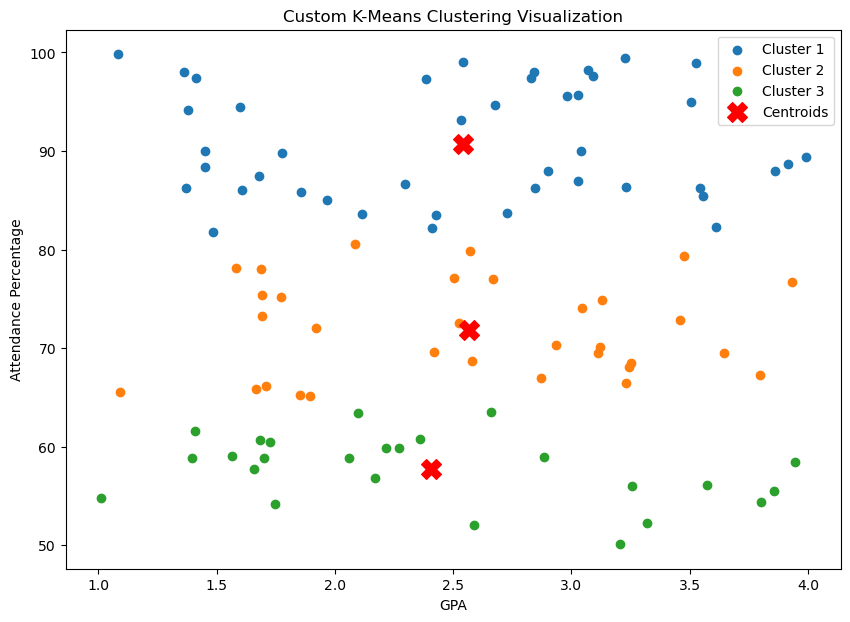

In [27]:
clusters = kmeans._assign_clusters(X_clust)

x_feature = data['GPA']
y_feature = data['Attendance_Percentage']

plt.figure(figsize=(10, 7))

for cluster_idx in range(kmeans.n_clusters):
    cluster_data = X_clust[clusters == cluster_idx]
    plt.scatter(
        cluster_data[:, 0], cluster_data[:, 1], 
        label=f'Cluster {cluster_idx + 1}'
    )


plt.scatter(
    kmeans.centroids[:, 0], kmeans.centroids[:, 1],
    c='red', marker='X', s=200, label='Centroids'
)


plt.xlabel('GPA')
plt.ylabel('Attendance Percentage')
plt.title('Custom K-Means Clustering Visualization')
plt.legend()
plt.show()
